In [2]:
from __future__ import print_function, division
from builtins import range

In [3]:
import gym 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def get_action(s,w):
    return 1 if s.dot(w)>0 else 0

In [5]:
def play_one_episode(env, params):
    observation = env.reset()
    done = False
    t = 0
    
    while not done and t<10000:
        t +=1
        action = get_action(observation, params)
        observation, rewards, done, info = env.step(action)
        if done: 
            break
    return t

In [6]:
def play_multiple_episodes(env, T, params):
    episode_lengths = np.empty(T)
    for i in range(T):
        episode_lengths[i]=play_one_episode(env, params)
    
    avg_length = episode_lengths.mean()
    print("avg length: ", avg_length)
    return avg_length
    
    

In [8]:
def random_search(env):
    episode_length = []
    best = 0 
    params = None
    
    for t in range(100):
        new_params = np.random.random(4)*2-1
        avg_length = play_multiple_episodes(env, 100, new_params)
        episode_length.append(avg_length)
        
        if avg_length > best:
            params = new_params
            best = avg_length
    return episode_length, params
    
        

avg length:  9.18
avg length:  200.0
avg length:  199.41
avg length:  9.0
avg length:  74.39
avg length:  9.57
avg length:  9.85
avg length:  9.38
avg length:  9.17
avg length:  9.64
avg length:  133.46
avg length:  9.73
avg length:  9.01
avg length:  59.29
avg length:  52.61
avg length:  88.28
avg length:  32.86
avg length:  75.05
avg length:  65.05
avg length:  59.95
avg length:  66.71
avg length:  8.94
avg length:  9.04
avg length:  14.1
avg length:  9.67
avg length:  31.49
avg length:  28.53
avg length:  9.38
avg length:  8.82
avg length:  9.33
avg length:  22.84
avg length:  9.71
avg length:  9.15
avg length:  9.3
avg length:  9.04
avg length:  9.06
avg length:  9.26
avg length:  68.05
avg length:  9.09
avg length:  9.46
avg length:  83.53
avg length:  101.36
avg length:  9.19
avg length:  8.85
avg length:  94.04
avg length:  42.19
avg length:  150.97
avg length:  168.53
avg length:  9.08
avg length:  9.11
avg length:  90.73
avg length:  26.37
avg length:  23.56
avg length:  9.2
a

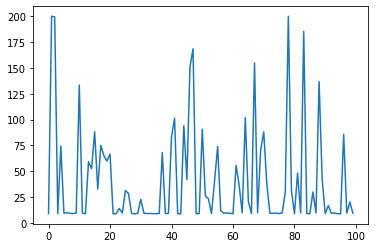

*** Final run with final weight ***
avg length:  200.0


In [10]:
if __name__ == "__main__":
    env = gym.make("CartPole-v0")
    episode_lengths, params = random_search(env)
    plt.plot(episode_lengths)
    plt.show()
    
    
    #play final set of episodes
    
    print("*** Final run with final weight ***")
    play_multiple_episodes(env, 100, params)